In [4]:
#importing the required libraries for the data manipulation and plotting the charts
import pandas as pd
import numpy as np
import glob , os
import matplotlib.pyplot as plt
import seaborn as sns
#importing warnings to avoid warnings
import warnings
warnings.filterwarnings('ignore')

# % Growth over previous year - All States 

/Users/nagarjunahebbar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


<Figure size 1152x648 with 0 Axes>

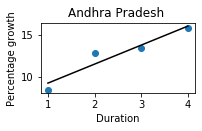

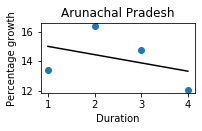

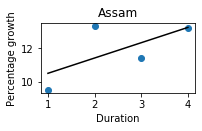

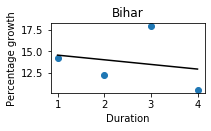

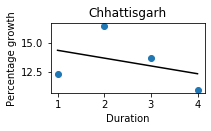

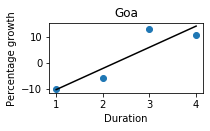

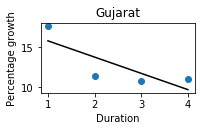

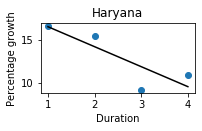

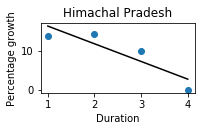

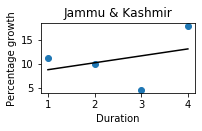

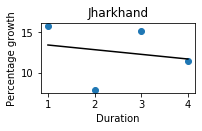

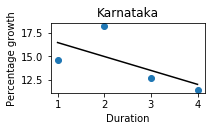

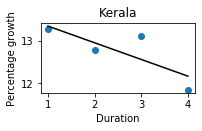

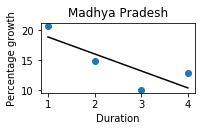

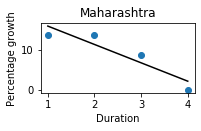

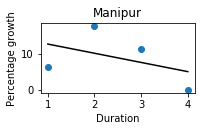

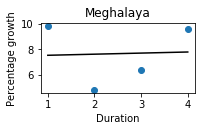

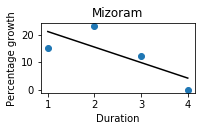

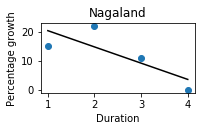

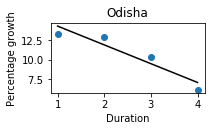

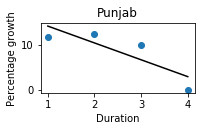

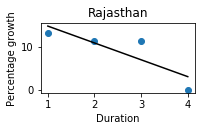

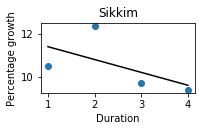

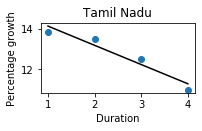

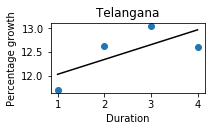

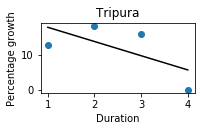

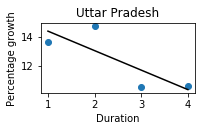

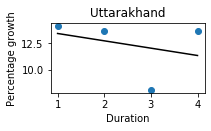

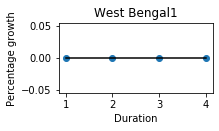

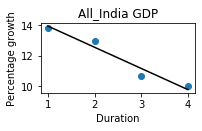

In [19]:
#path of the files located in the system
path = r'/Users/nagarjunahebbar/GDP_VenkataNagarjuna'
#reading the required csv file from the path
part1df = pd.read_csv(path + "/ab40c054-5031-4376-b52e-9813e776f65e.csv")[6:10]
#droping the UT's from the data frame as we are not using any UT's in the analysis
part1dfa = part1df.drop(['Andaman & Nicobar Islands','Chandigarh','Delhi','Puducherry','Items  Description'],axis=1)
df_states = pd.DataFrame(part1dfa)
#replacing NaN values with Zero
df_states = df_states.fillna(0)

n=0
#creating scatter plot for all the states through loop
for col in df_states.columns:
    n+=1
    #fixing the size of the plot
    plt.figure(figsize=(16,9))
    if col!='Duration':
        plt.subplot(6,5,n-1)
        plt.title(col)
        plt.xlabel('Duration')
        plt.ylabel('Percentage growth')
        plt.plot([1,2,3,4],df_states[col],'o')
        one=np.polyfit([1,2,3,4],df_states[col],1)
        y1=np.polyval(one,[1,2,3,4])
        plt.plot([1,2,3,4],y1,'k')
        

plt.show()

#### How will you compare the growth rates of any two states?

Ans: The growth rate can be compared with the percentage of the growth for the years. If both are increasing at the same level or increasing at the rapid level depends on the percentage of growth over the years


#### Which states have been growing consistently fast, and which ones have been struggling? Rank top 3 fastest and 3 slowest-growing states.

Andhra Pradesh, Telangana, Goa are perfomring well and their growth rate is also in good pace. 
Himachal Pradesh, Madhya Pradesh, Karnataka are struggling and their growth rate is consistantly declining

#### What is the Nation's growth rate?

Nation Growth rate is decreasing over the years.

#### What has been the growth rate of your home state, and how does it compare to the national growth rate?

I am considering my home State as Andhra Pradesh and comparing with the Nation Growth. Andhra Pradesh is performing well in terms of growth over the years and it is contributing its role in the national growth rate.

#  Plot for growth across all states in GDP - 2015-16

#### Which Plot will you use for this? Why? (Remeber to plot the graph in a way such as it is easier to read and compare)

Answer: Bar chart - bar chart will be best to read and compare the GDP rate across the states.

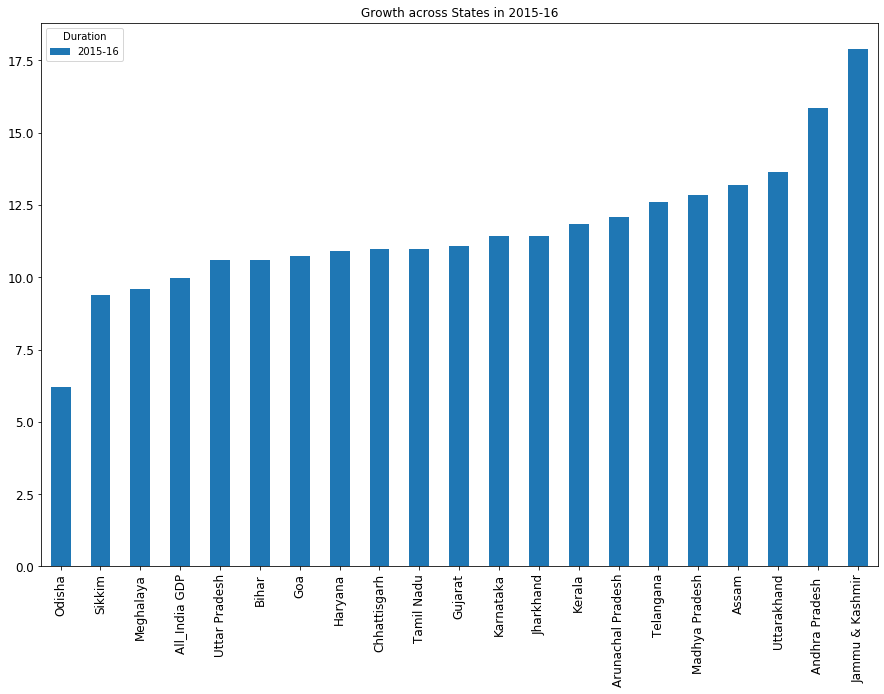

In [20]:
df_states =  df_states.drop([6,7,8])
df_states = df_states.T
df_states.columns = df_states.iloc[0]
df_states = df_states.T
df_states  =df_states.drop(["Duration"],axis=1)
df_states = df_states.T
df_states = df_states.sort_values('2015-16',axis=0,ascending=True,inplace=False)
df_states = df_states.loc[df_states.ne(0).all(axis=1)]
df_states
df_states_All = df_states[['2015-16']].plot(kind='bar', title ="Growth across States in 2015-16", figsize=(15, 10), legend=True, fontsize=12)
#ax.set_xlabel("2015-16", fontsize=12)
#ax.set_ylabel("Duration", fontsize=12)
plt.show()

# Performance 

In [23]:
# Performance 
df_states['Performance'] = (df_states['2015-16']/(df_states['2015-16'].sum()))*100
df_states = df_states.sort_values('Performance',ascending=True,inplace=False)
df_states

Duration,2015-16,Performance
Odisha,6.19,2.53803
Sikkim,9.39,3.8501
Meghalaya,9.58,3.928
All_India GDP,9.99,4.09611
Uttar Pradesh,10.58,4.33802
Bihar,10.59,4.34212
Goa,10.75,4.40772
Haryana,10.91,4.47333
Chhattisgarh,10.98,4.50203
Tamil Nadu,10.99,4.50613


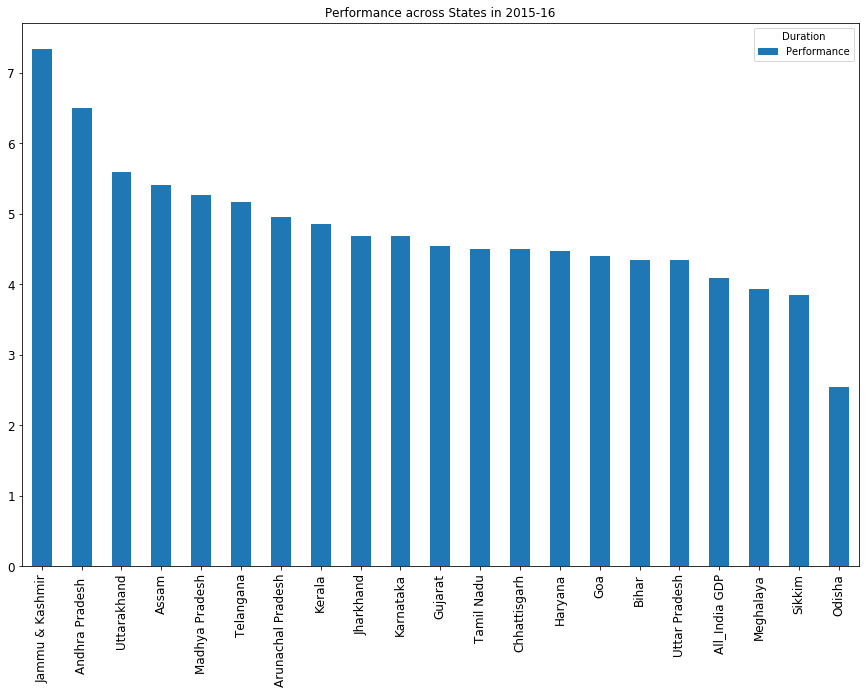

In [97]:
df_states_All = df_states[['Performance']].plot(kind='bar', title ="Performance across States in 2015-16", figsize=(15, 10), legend=True, fontsize=12)


#
plt.show()

#### Identify the top 5 and the bottom 5 states based on total GDP.
Top 5 States: 
Jammu & Kashmir 
Andhra Pradesh
Uttarakhand
Assam
Madhya pradesh
Bottom 5 States:
Odisha
Sikkim
Meghalaya
Uttar Pradesh
Bihar

    
#### What insights can you draw from this graph? What states are performing poorly? (Remember: this will not be solely based on total GDP)

From the above two graphs, we can identify the states performance in 2015-16. Odisha, Sikkim and Meghalaya are performing very poortly in this year based on the performance calculated above.

# Part 1-B

In [24]:
#path of the files where they are located
path = r'/Users/nagarjunahebbar/GDP_VenkataNagarjuna/PartB'
all_files = glob.glob(path+'/*.csv')
li=[]

for filename in all_files:
    #reading all csv files
    df = pd.read_csv(filename, index_col=None, header=0,encoding ='cp1252')
    #selecting 2014-15 data as per the requirement
    df = df[['S.No.','Item','2014-15']]
    #transposing the data frame
    df = df.T
    #setting the column header
    columnheader = df.iloc[1]
    #getting the data 
    df = df[2:]
    #Assigning the columns from the column header
    df.columns=columnheader
    #Adding state column as we are appending all data in one data frame
    df['State'] = filename.split('/NAD-')[-1].split('-')[0].split('.')[0]
    #appending to the List 
    li.append(df)
#Converting list to data frame - fianl data frame
df1b = pd.concat(li,axis=0, ignore_index=True, sort=True)

,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross State Domestic Product,...,Subsidies on products,TOTAL GSVA at basic prices,TOTAL NSVA at basic prices,Taxes on Products,Tertiary,Trade & repair services,Trade & repair services*,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport
0,15044394,13469,1150955,5353326,7673441,1122888,1827413,58036,1956660,61219447,...,2333442,58158386,NaN,5394503,26015812,6942748,NaN,7297290,3814461,0
1,7591501,120691,753992,2854024,4162493,716266,3023729,266968,210741,51117765,...,836700,47528765,NaN,4425700,28471410,5724128,NaN,6494607,3604741,0
2,6422978,15354,513531,2402396,4382636,833067,1065147,460636,791463,32197092,...,1209349,30255256,NaN,3151184,12256258,2886789,NaN,3149555,2034016,50349
3,3855548,26223,357619,1733568,2890544,296587,543651,529539,261987,19809800,...,582406,18666897,NaN,1725309,9307109,2876251,NaN,2987155,1194568,4502
4,7951890,13599,919427,3449763,4688237,345168,1178022,653224,550132,37391988,...,2006421,36184863,NaN,3213546,22179969,7081391,NaN,7448373,3147173,2228
5,607897,4153,37794,156072,375825,37944,60393,8470,99802,1841424,...,37745,1821495,NaN,57674,992956,134174,NaN,140781,77521,600
6,243327,336646,600670,1924484,59913,614937,6850021,881,851,NaN,...,392546,NaN,38524336,6611719,32516613,4946896,NaN,5441535,4602337,364
7,308507,46359,44028,165819,140421,204110,233618,122201,15744,4063307,...,61854,3597882,NaN,527279,1738217,343492,NaN,380927,189656,17820
8,5930617,125029,884767,7314003,3070386,482470,2010306,704319,499808,52600230,...,822381,48233259,NaN,5189352,29673778,NaN,7763847,8557345,4020934,26956
9,16235647,26746,905381,4403151,13216013,1272905,1988794,121277,965588,48198169,...,2102800,46016269,NaN,4284700,18117360,5053625,NaN,5357515,2865802,0


In [25]:
#assigning to another dataframe 
part1b = df1b
#removing UT's
part1b = part1b.drop(part1b[(part1b['State'] == 'Andaman_Nicobar_Islands')].index)
part1b = part1b.drop(part1b[(part1b['State'] == 'Puducherry')].index)
part1b = part1b.drop(part1b[(part1b['State'] == 'Goa')].index)
part1b = part1b.drop(part1b[(part1b['State'] == 'Delhi')].index)
part1b = part1b.drop(part1b[(part1b['State'] == 'Chandigarh')].index)
# displaying the data frame for the cross check
part1b

,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross State Domestic Product,...,Subsidies on products,TOTAL GSVA at basic prices,TOTAL NSVA at basic prices,Taxes on Products,Tertiary,Trade & repair services,Trade & repair services*,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport
0,15044394,13469,1150955,5353326,7673441,1122888,1827413,58036,1956660,61219447,...,2333442,58158386,NaN,5394503,26015812,6942748,NaN,7297290,3814461,0
1,7591501,120691,753992,2854024,4162493,716266,3023729,266968,210741,51117765,...,836700,47528765,NaN,4425700,28471410,5724128,NaN,6494607,3604741,0
2,6422978,15354,513531,2402396,4382636,833067,1065147,460636,791463,32197092,...,1209349,30255256,NaN,3151184,12256258,2886789,NaN,3149555,2034016,50349
3,3855548,26223,357619,1733568,2890544,296587,543651,529539,261987,19809800,...,582406,18666897,NaN,1725309,9307109,2876251,NaN,2987155,1194568,4502
4,7951890,13599,919427,3449763,4688237,345168,1178022,653224,550132,37391988,...,2006421,36184863,NaN,3213546,22179969,7081391,NaN,7448373,3147173,2228
5,607897,4153,37794,156072,375825,37944,60393,8470,99802,1841424,...,37745,1821495,NaN,57674,992956,134174,NaN,140781,77521,600
8,5930617,125029,884767,7314003,3070386,482470,2010306,704319,499808,52600230,...,822381,48233259,NaN,5189352,29673778,NaN,7763847,8557345,4020934,26956
9,16235647,26746,905381,4403151,13216013,1272905,1988794,121277,965588,48198169,...,2102800,46016269,NaN,4284700,18117360,5053625,NaN,5357515,2865802,0
10,217010,144,17395,133228,116609,128365,23168,7048,47763,1155933,...,20440,1133289,NaN,43084,637619,111324,NaN,114315,52587,331
11,3948847,9507,294552,2669855,2613371,1198438,739057,385483,597785,23498180,...,1332092,22228481,NaN,2601791,7588778,1414164,NaN,1535571,871770,0


In [ ]:
#droping the sub sub sectors such as they are not required in this analysis.
part1b = part1b.drop([
'Crops',
'Livestock',
'Forestry and logging',
'Fishing and aquaculture',
'Trade & repair services',
'Hotels & restaurants',
'Railways',
'Road transport',
'Water transport',
'Air transport',
'Services incidental to transport',
'Storage',
'Communication & services related to broadcasting'], axis=1)

#### Plot the GDP per capita for all the states.

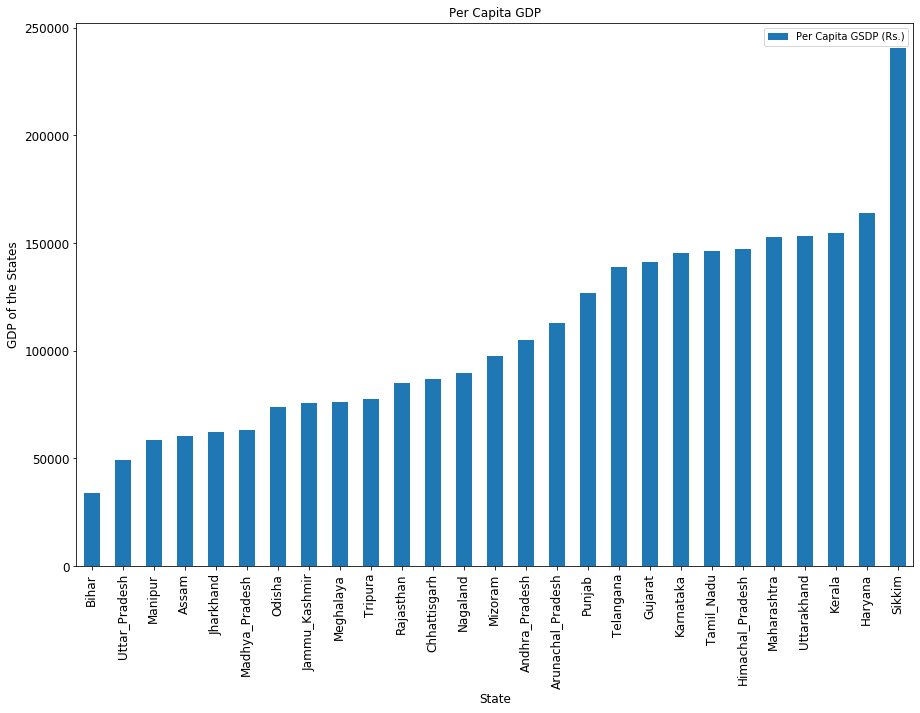

In [26]:
#copying the state and per capita GSDP to the new data frame 
part_percapitaGDP = part1b[['State','Per Capita GSDP (Rs.)'] ].copy()
# sorting the Per Capita GSDP in ascending order 
part_percapitaGDP = part_percapitaGDP.sort_values('Per Capita GSDP (Rs.)',axis=0,ascending=True,inplace=False)
#ploting the bar chart between the per capita GSDP and states
part_percapitaGDP_All = part_percapitaGDP[['Per Capita GSDP (Rs.)']].plot(kind='bar', title ="Per Capita GDP", figsize=(15, 10), legend=True, fontsize=12)
part_percapitaGDP_All.set_xlabel('State', fontsize=12)
part_percapitaGDP_All.set_ylabel("GDP of the States", fontsize=12)
plt.xticks(range(len(part_percapitaGDP['State'])), part_percapitaGDP['State'])

plt.show()

#### Identify the top 5 and the bottom 5 states based on the GDP per capita.
Top 5 States:
  Sikkim
  Haryana
  Kerala
  Uttarakhand
  Maharashtra
Bottom 5 States:
  Jharkhand
  Assam
  Manipur
  Uttar_Pradesh
  Bihar
    

#### Find the ratio of the highest per capita GDP to the lowest per capita GDP.
The Ratio of Highest per capita GDP to Lowest Per Capita GDP is 7.077

#### Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.
#### Which plot will you use here? Why?

I will be using the Stacked bar chart becasue three sections need to be represented in the same plot and three sections will be contributing to the total GSDP. Hence I will be using the Stacked bar chart.



In [28]:
part_pst = part1b[['State','Primary','Secondary','Tertiary','Gross State Domestic Product','Per Capita GSDP (Rs.)'] ].copy()

part_pst['PerPrimary'] = (part_pst['Primary']/(part_pst['Gross State Domestic Product']))*100
part_pst['PerSecondary'] = (part_pst['Secondary']/(part_pst['Gross State Domestic Product']))*100
part_pst['PerTertiary'] = (part_pst['Tertiary']/(part_pst['Gross State Domestic Product']))*100
part_pst

,State,Primary,Secondary,Tertiary,Gross State Domestic Product,Per Capita GSDP (Rs.),PerPrimary,PerSecondary,PerTertiary
0,Rajasthan,19113780,13028794,26015812,61219447,84837,31.2217,21.2821,42.496
1,Telangana,9133354,9924001,28471410,51117765,139035,17.8673,19.414,55.6977
2,Odisha,9009306,8989693,12256258,32197092,73979,27.9817,27.9208,38.0664
3,Assam,5326697,4033091,9307109,19809800,60621,26.8892,20.3591,46.9823
4,Bihar,8019997,5984896,22179969,37391988,33954,21.4484,16.0058,59.3174
5,Nagaland,616178,212361,992956,1841424,89607,33.462,11.5324,53.9233
8,Kerala,6489442,12070040,29673778,52600230,154778,12.3373,22.9467,56.4138
9,Madhya_Pradesh,17854020,10044889,18117360,48198169,62989,37.0429,20.8408,37.5893
10,Mizoram,225598,270072,637619,1155933,97687,19.5165,23.364,55.1605
11,Chhattisgarh,6400817,8238886,7588778,23498180,86860,27.2396,35.0618,32.2952


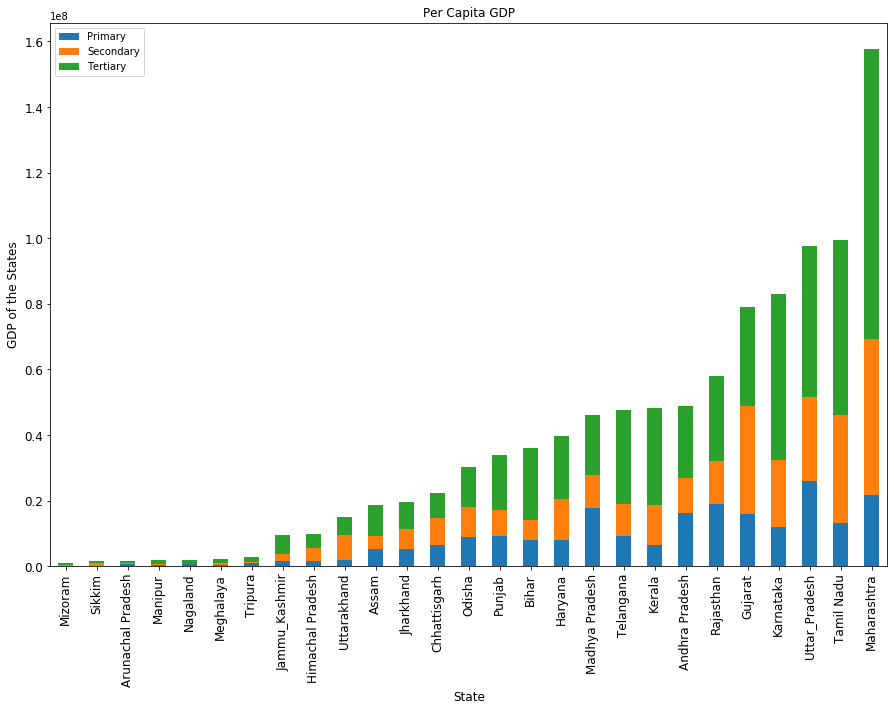

In [103]:
part_pst = part_pst.sort_values('Gross State Domestic Product',axis=0,ascending=True,inplace=False)

part_pst_All = part_pst[['Primary','Secondary','Tertiary']].plot(kind='bar', stacked=True, title ="Per Capita GDP", figsize=(15, 10), legend=True, fontsize=12)
part_pst_All.set_xlabel('State', fontsize=12)
part_pst_All.set_ylabel("GDP of the States", fontsize=12)
plt.xticks(range(len(part_pst['State'])), part_pst['State'])

plt.show()

#### Why is (Primary + Secondary + Tertiary) not equal to total GDP?
There will be an other sector which is also contributing in GDP. Here we are Considering the Primary, Secondary, and Tertiary Sectors as the main and major contributors of the GDP. Because of the Other sector these totals are not matching.
#### Can you draw any insight from this? Find correlation of percentile of the state (% of states with lower per capita GDP) and %contribution of Primary sector to total GDP.

We have drawn the correlation of the

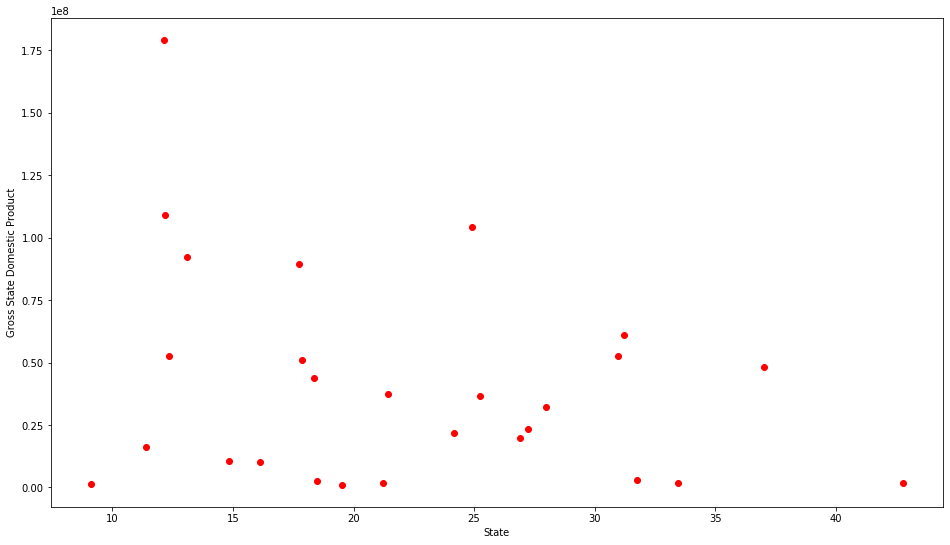

In [52]:
part_pst['Percentile of State'] = (part_pst['Gross State Domestic Product'].rank(pct=True))*100
# correlation of percentile of state and conribution to primary sector
part_pst['PerPrimary'] = np.float64(part_pst['PerPrimary'])
part_pst['Percentile of State'] = np.float64(part_pst['Percentile of State'])
part_pst['corr State primary'] = part_pst['Percentile of State'].corr(part_pst['PerPrimary'])

plt.figure(figsize=(16,9))
plt.scatter(part_pst['PerPrimary'],part_pst['Gross State Domestic Product'],  color='r')
plt.xlabel('State')
plt.ylabel('Gross State Domestic Product')
plt.xticks(range(len(part_pst['State'])), part_pst['State'], rotation = 90,)       

plt.show()

In [54]:
part_pst2 = part1b[['State','Agriculture, forestry and fishing',
                    'Mining and quarrying',
                    'Manufacturing',
                    'Electricity, gas, water supply & other utility services',
                    'Construction',
                    'Trade, repair, hotels and restaurants',
                    'Transport, storage, communication & services related to broadcasting',
                    'Financial services',
                    'Real estate, ownership of dwelling & professional services',
                    'Public administration',
                    'Other services','Gross State Domestic Product','Per Capita GSDP (Rs.)'] ].copy()

part_pst2['Total'] = part_pst2.loc[:,['Agriculture, forestry and fishing', 'Mining and quarrying', 'Manufacturing', 
                                      'Electricity, gas, water supply & other utility services', 
                                      'Construction', 'Trade, repair, hotels and restaurants', 'Transport, storage, communication & services related to broadcasting', 
                                      'Financial services', 'Real estate, ownership of dwelling & professional services', 'Public administration',
                                      'Other services']].sum(axis=1)

cat_labels = ['C1', 'C2', 'C3', 'C4']
part_pst2['Category'] = pd.qcut(part_pst2['Per Capita GSDP (Rs.)'],
                              q=[0,.2, .5, .85, 1],
                              labels=cat_labels)

part_pst2c4 = part_pst2[part_pst2['Category'] == 'C4']
part_pst2c3 = part_pst2[part_pst2['Category'] == 'C3']
part_pst2c2 = part_pst2[part_pst2['Category'] == 'C2']
part_pst2c1 = part_pst2[part_pst2['Category'] == 'C1']


,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product,Per Capita GSDP (Rs.),Total,Category
0,Rajasthan,15044394,4069385,6552580,1122888,5353326,7297290,3814461,1827413,6451997,2460364,4164287,61219447,84837,58158385.0,C2
1,Telangana,7591501,1541853,6353711,716266,2854024,6494607,3604741,3023729,9478839,1711265,4158229,51117765,139035,47528765.0,C3
2,Odisha,6422978,2586328,5754229,833067,2402396,3149555,2034016,1065147,2348714,1318221,2340603,32197092,73979,30255254.0,C2
3,Assam,3855548,1471149,2002936,296587,1733568,2987155,1194568,543651,1412466,1373611,1795658,19809800,60621,18666897.0,C1
4,Bihar,7951890,68107,2189965,345168,3449763,7448373,3147173,1178022,3740641,2078171,4587589,37391988,33954,36184862.0,C1
5,Nagaland,607897,8280,18346,37944,156072,140781,77521,60393,159651,295424,259186,1841424,89607,1821495.0,C2
8,Kerala,5930617,558824,4273567,482470,7314003,8557345,4020934,2010306,7287633,2068915,5728645,52600230,154778,48233259.0,C4
9,Madhya_Pradesh,16235647,1618373,4368833,1272905,4403151,5357515,2865802,1988794,2660123,2497321,2747805,48198169,62989,46016269.0,C1
10,Mizoram,217010,8588,8479,128365,133228,114315,52587,23168,55068,206259,186222,1155933,97687,1133289.0,C2
11,Chhattisgarh,3948847,2451970,4370593,1198438,2669855,1535571,871770,739057,2462166,867982,1112232,23498180,86860,22228481.0,C2


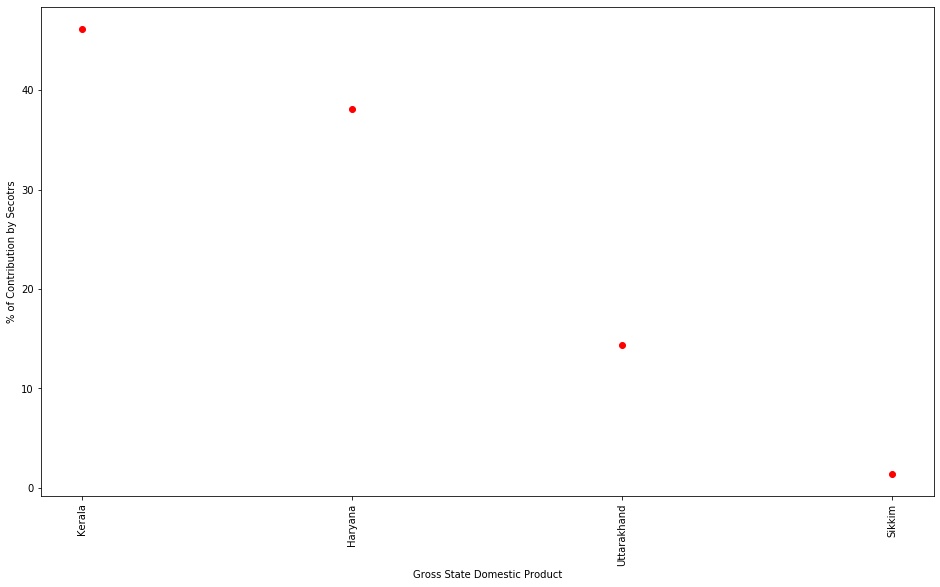

In [57]:
#calculating the category total
catTotalc4 = part_pst2c4['Total'].sum(axis=0)
part_pst2c4['%Contribution'] = (part_pst2c4['Total']/catTotalc4)*100
part_pst2c4 = part_pst2c4.sort_values('%Contribution',axis=0,ascending=False,inplace=False)
plt.figure(figsize=(16,9))
plt.scatter(part_pst2c4['State'],part_pst2c4['%Contribution'],  color='r')
plt.xlabel('Gross State Domestic Product')
plt.ylabel('% of Contribution by Secotrs')
plt.xticks(range(len(part_pst2c4['State'])), part_pst2c4['State'], rotation = 90)       

plt.show()

In [ ]:
catTotalc3 = part_pst2c3['Total'].sum(axis=0)
part_pst2c3['%Contribution'] = (part_pst2c3['Total']/catTotalc3)*100
part_pst2c3 = part_pst2c3.sort_values('%Contribution',axis=0,ascending=False,inplace=False)
plt.figure(figsize=(16,9))
plt.scatter(part_pst2c3['State'],part_pst2c3['%Contribution'],  color='r')
plt.xlabel('Gross State Domestic Product')
plt.ylabel('% of Contribution by Secotrs')
plt.xticks(range(len(part_pst2c3['State'])), part_pst2c3['State'], rotation = 90)       

plt.show()

In [ ]:
catTotalc2 = part_pst2c2['Total'].sum(axis=0)
part_pst2c2['%Contribution'] = (part_pst2c2['Total']/catTotalc2)*100

part_pst2c2 = part_pst2c2.sort_values('%Contribution',axis=0,ascending=False,inplace=False)
plt.figure(figsize=(16,9))
plt.scatter(part_pst2c2['State'],part_pst2c2['%Contribution'],  color='r')
plt.xlabel('Gross State Domestic Product')
plt.ylabel('% of Contribution by Secotrs')
plt.xticks(range(len(part_pst2c2['State'])), part_pst2c2['State'], rotation = 90)       

plt.show()

In [ ]:
catTotalc1 = part_pst2c1['Total'].sum(axis=0)
part_pst2c1['%Contribution'] = (part_pst2c1['Total']/catTotalc1)*100

part_pst2c1 = part_pst2c1.sort_values('%Contribution',axis=0,ascending=False,inplace=False)
plt.figure(figsize=(16,9))
plt.scatter(part_pst2c1['State'],part_pst2c1['%Contribution'],  color='r')
plt.xlabel('Gross State Domestic Product')
plt.ylabel('% of Contribution by Secotrs')
plt.xticks(range(len(part_pst2c1['State'])), part_pst2c1['State'], rotation = 90)       

plt.show()







# PART II

In [87]:
#path of the files located in the system
path = r'/Users/nagarjunahebbar/GDP_VenkataNagarjuna'
#reading the required csv file from the path
part2df = pd.read_csv(path + "/rs_session243_au570_1.1.csv")
part2df = part2df.rename(columns = {list(part2df)[1]:"State"})
#droping the other years data from the data frame as we are not using in the analysis
part2dfa = part2df.drop(['Primary - 2012-2013',
'Primary - 2014-2015.1','Upper Primary - 2012-2013','Upper Primary - 2013-2014', 'Secondary - 2012-2013','Secondary - 2013-2014'
,'Senior Secondary - 2012-2013','Senior Secondary - 2013-2014','Senior Secondary - 2014-2015'],axis=1)
part2dfa.set_index('Sl. No.')

part2dfa = part2dfa.T
columnheader = part2dfa.iloc[1]
    #getting the data 
part2dfa = part2dfa[2:]
     #Assigning the columns from the column header
part2dfa.columns=columnheader

part2dfa = part2dfa.drop(['A & N Islands','Chandigarh','Delhi','Dadra & Nagar Haveli','Daman & Diu','Goa', 
                             'Jammu and Kashmir','Lakshadweep','Puducherry'],axis=1)

part2dfa = part2dfa.T


,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
State,,,
Andhra Pradesh,4.35,5.2,15.71
Arunachal Pradesh,10.89,6.71,17.11
Assam,7.44,10.51,27.06
Bihar,2.09,4.08,25.9
Chhatisgarh,1.42,5.85,21.26
Gujarat,0.76,6.41,25.04
Haryana,0.41,5.81,15.89
Himachal Pradesh,0.46,0.87,6.07
Jharkhand,6.41,8.99,24


In [91]:
#Cleaning the Data before merging 
# Andhra Pradesh
# Arunachal Pradesh
# Himachal Pradesh
# Madhya Pradesh
# Tamil Nadu
# Uttar Pradesh
# West Bengal
# All India

part_pst['State'] = part_pst['State'].replace(['Andhra_Pradesh'], 'Andhra Pradesh')
part_pst['State'] = part_pst['State'].replace(['Arunachal_Pradesh'], 'Arunachal Pradesh')
part_pst['State'] = part_pst['State'].replace(['Himachal_Pradesh'], 'Himachal Pradesh')
part_pst['State'] = part_pst['State'].replace(['Madhya_Pradesh'], 'Madhya Pradesh')
part_pst['State'] = part_pst['State'].replace(['Tamil_Nadu'], 'Tamil Nadu')
part_pst['State'] = part_pst['State'].replace(['West_Bengal'], 'West Bengal')
part_pst['State'] = part_pst['State'].replace(['All_India'], 'All India')

part_II_merged = pd.merge(part_pst,part2dfa,on="State")


,State,Primary,Secondary,Tertiary,Gross State Domestic Product,Per Capita GSDP (Rs.),PerPrimary,PerSecondary,PerTertiary,Percentile of State,corr State primary,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,totalDropouts
12,Bihar,8019997.0,5984896.0,22179969.0,37391988.0,33954.0,21.448437,16.005825,59.317437,59.259259,-0.178635,2.09,4.08,25.90,32.07
3,Manipur,383140.0,220173.0,1177334.0,1804276.0,58442.0,21.235110,12.202845,65.252434,14.814815,-0.178635,18.00,4.20,14.38,36.58
8,Assam,5326697.0,4033091.0,9307109.0,19809800.0,60621.0,26.889201,20.359070,46.982347,40.740741,-0.178635,7.44,10.51,27.06,45.01
9,Jharkhand,5248354.0,6241471.0,8133341.0,21710718.0,62091.0,24.174023,28.748340,37.462331,44.444444,-0.178635,6.41,8.99,24.00,39.40
14,Madhya Pradesh,17854020.0,10044889.0,18117360.0,48198169.0,62989.0,37.042942,20.840810,37.589312,66.666667,-0.178635,10.14,9.20,24.77,44.11
10,Odisha,9009306.0,8989693.0,12256258.0,32197092.0,73979.0,27.981738,27.920823,38.066351,51.851852,-0.178635,2.94,3.81,29.56,36.31
5,Meghalaya,451050.0,637942.0,1200655.0,2440807.0,76228.0,18.479544,26.136520,49.190903,22.222222,-0.178635,10.34,6.52,20.52,37.38
6,Tripura,942216.0,484393.0,1484709.0,2966662.0,77358.0,31.760140,16.327880,50.046450,25.925926,-0.178635,3.58,1.99,28.42,33.99
18,Rajasthan,19113780.0,13028794.0,26015812.0,61219447.0,84837.0,31.221746,21.282116,42.495993,81.481481,-0.178635,8.39,3.07,13.48,24.94
4,Nagaland,616178.0,212361.0,992956.0,1841424.0,89607.0,33.462038,11.532434,53.923268,18.518519,-0.178635,19.41,7.92,18.23,45.56


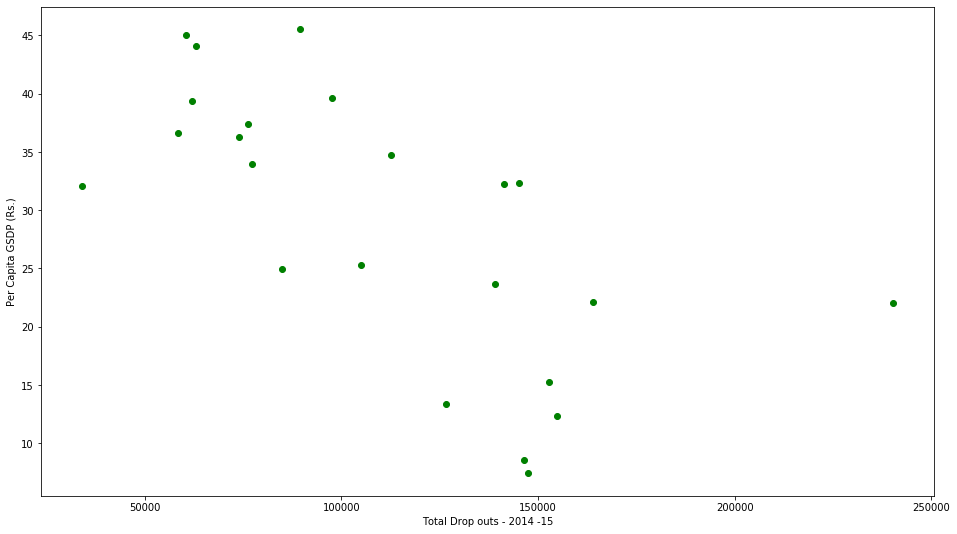

In [92]:
#part_II_merged = part_II_merged.fillna(0)
#part_II_merged['totalDropouts'] = part_II_merged['Primary - 2014-2015'] + part_II_merged['Upper Primary - 2014-2015'] + part_II_merged['Secondary - 2014-2015']

part_II_merged = part_II_merged.sort_values('Per Capita GSDP (Rs.)',axis=0,ascending=True,inplace=False)
plt.figure(figsize=(16,9))
plt.scatter(part_II_merged['Per Capita GSDP (Rs.)'],part_II_merged['totalDropouts'],  color='g')
plt.xlabel('Per Capita GSDP (Rs.)')
plt.ylabel('Total Drop outs - 2014 -15')
#plt.xticks(range(len(part_II_merged['State'])), part_II_merged['State'])       

plt.show()

([<matplotlib.axis.XTick at 0x1a1d767be0>,
 <a list of 23 Text xticklabel objects>)

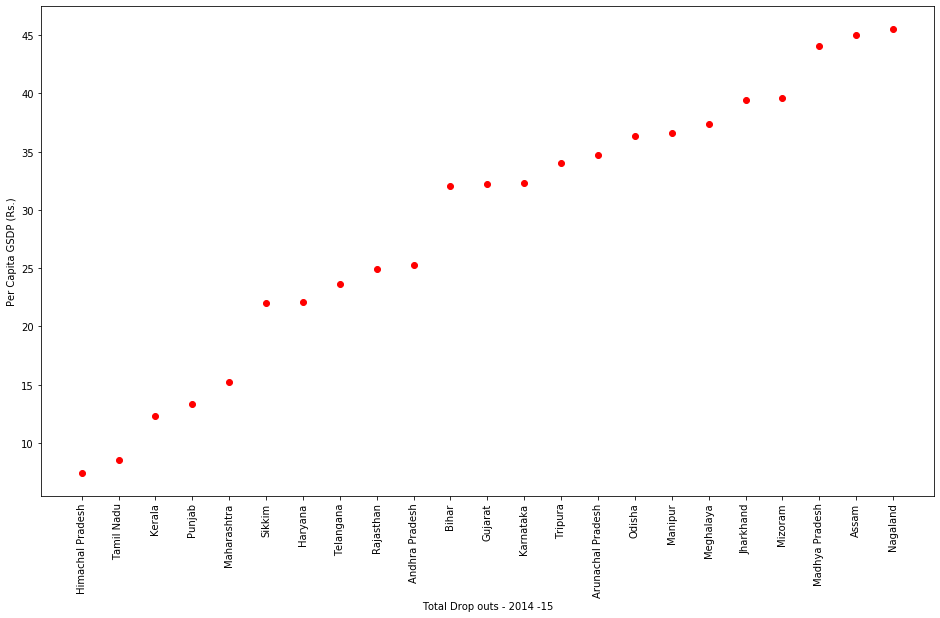

In [94]:

part_II_merged = part_II_merged.sort_values('totalDropouts',axis=0,ascending=True,inplace=False)
plt.figure(figsize=(16,9))
plt.scatter(part_II_merged['State'],part_II_merged['totalDropouts'],  color='r')
plt.xlabel('Total Drop outs - 2014 -15 - States')
plt.ylabel('Drop out rate')
plt.xticks(range(len(part_II_merged['State'])), part_II_merged['State'],rotation=90) 
